In [1]:
import numpy as np;
import scipy.signal as signal
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [16]:
def mfreqz(b,a,order,nyq_rate = 1):
    
    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:
        
        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)
        
        order: order of the filter 
                
        nyq_rate = nyquist frequency
    """
    
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));
    
    plt.figure();
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();
    
    #plt.xlim((40,60))
    
    plt.grid(True);
    
    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)
    
    
    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

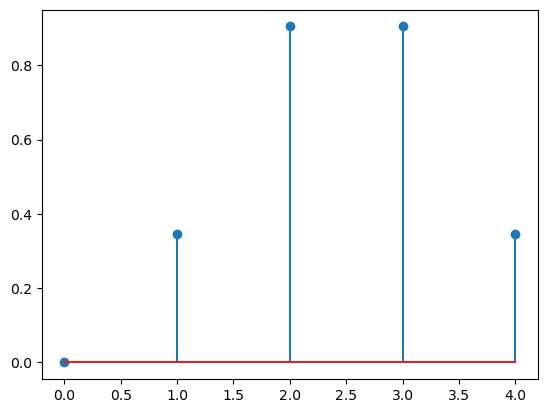

In [17]:
order = 5
n = np.arange(0,order,1)
hann = np.sin(np.pi*n/(order))*np.sin(np.pi*n/(order))
plt.stem(hann)
plt.show()

Ventana de Hann

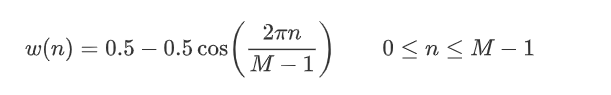

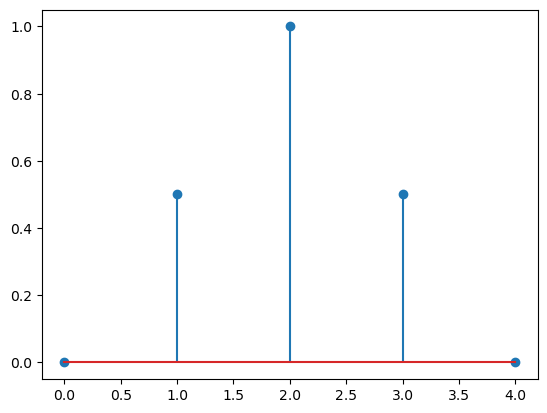

In [18]:
order = 5
n = np.arange(0,order,1)
hann = 0.5 - 0.5*np.cos(2*np.pi*n/(order - 1))
plt.stem(hann)
plt.show()

Formula del filtro

[-2 -1  0  1  2]


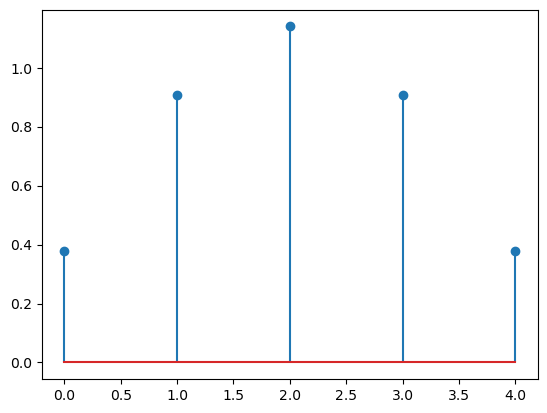

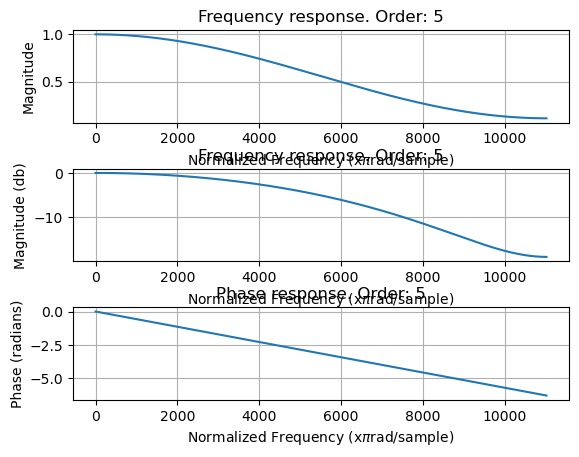

In [19]:
#low pass filter 100 Hz with order = 5 
fs = 22050

fc = 4000/fs

#valores enteros
m = np.arange(-order/2, (order/2),dtype=int)

print(m)

b = np.zeros((m.shape[0]))
b[m==0] = 2*np.pi*fc # No division by zero
b[m!=0] = np.sin(2*np.pi*fc*m[m!=0]) / m[m!=0] # Sinc

plt.stem(b)

b = b * hann # Windowing
b = b / np.sum(b) # Normalization to unity gain at DC



mfreqz(b,1,5, fs/2);

C:\Users\Esteban\AppData\Local\Temp\ipykernel_10576\389786727.py:17: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * np.log10 (abs(h));


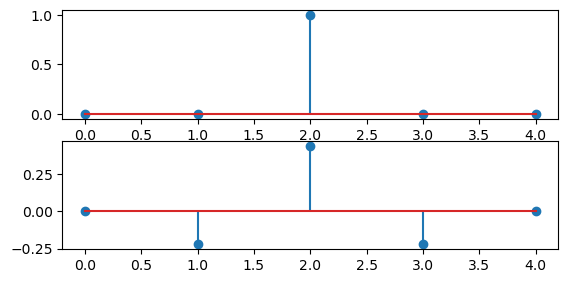

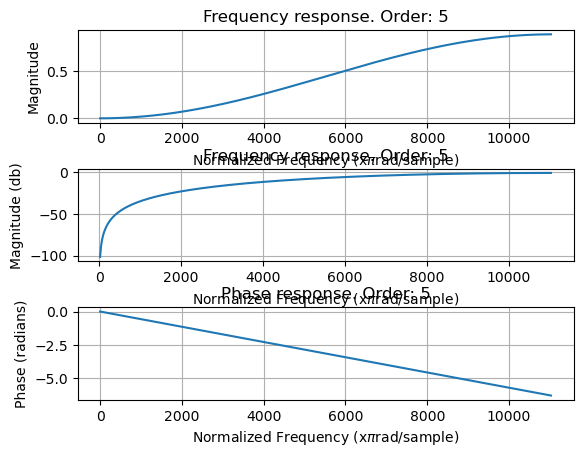

In [20]:
#high pass filter 5Hz with order = 265 (for a transition band of 25%) and hamming window
from scipy import signal

delta = signal.unit_impulse(order,2)
plt.subplot(3,1,2)
plt.stem(delta)

bhpf = delta - b
plt.subplot(3,1,3)
plt.stem(bhpf)

mfreqz(bhpf,1,order, fs/2);

In [21]:
print(b)

[0.         0.2217757  0.55644859 0.2217757  0.        ]


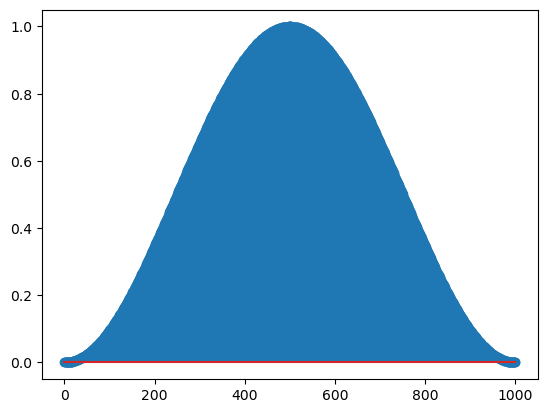

[-500 -499 -498 ...  498  499  500]


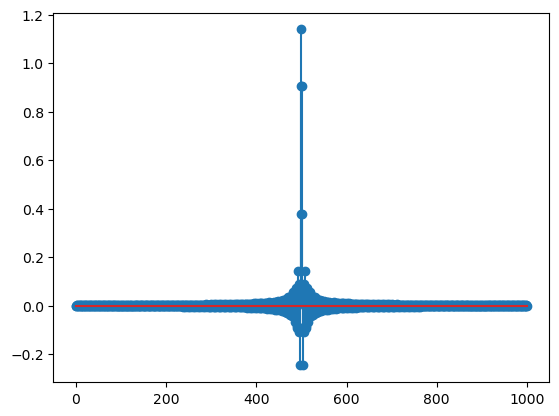

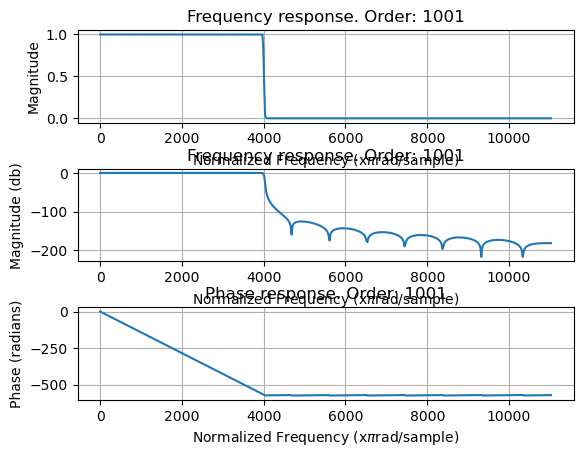

In [22]:
order = 1001
n = np.arange(0,order,1)
hann = 0.5 - 0.5*np.cos(2*np.pi*n/(order - 1))
plt.stem(hann)
plt.show()

#low pass filter 100 Hz with order = 5 
fs = 22050

fc = 4000/fs

m = np.arange(-order/2, (order/2),dtype=int)

print(m)

b = np.zeros((m.shape[0]))
b[m==0] = 2*np.pi*fc # No division by zero
b[m!=0] = np.sin(2*np.pi*fc*m[m!=0]) / m[m!=0] # Sinc

plt.stem(b)

b = b * hann # Windowing
b = b / np.sum(b) # Normalization to unity gain at DC



mfreqz(b,1,order, fs/2);

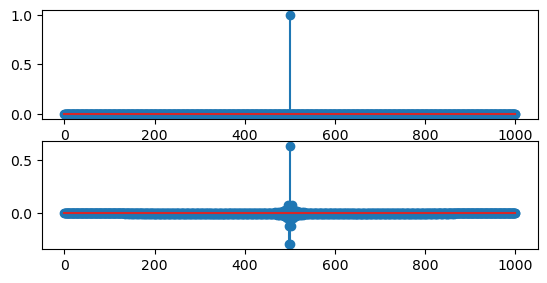

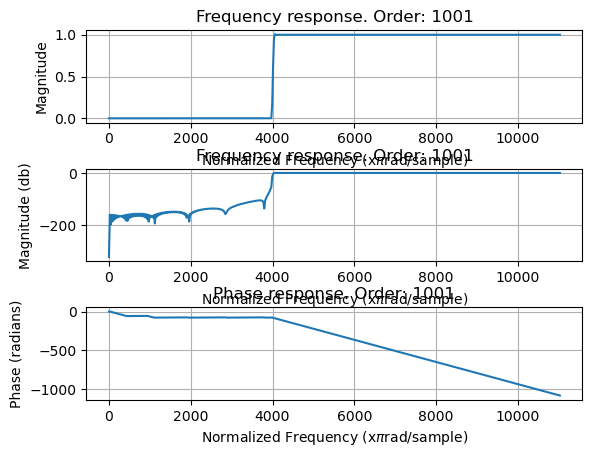

In [23]:
delta = signal.unit_impulse(order,500)
plt.subplot(3,1,2)
plt.stem(delta)

bhpf = delta - b
plt.subplot(3,1,3)
plt.stem(bhpf)

mfreqz(bhpf,1,order, fs/2);